In [1]:
import pandas as pd

import pycircos
import collections
import matplotlib.pyplot as plt
Garc    = pycircos.Garc
Gcircle = pycircos.Gcircle

In [2]:
#Set chromosomes
circle = Gcircle() 
with open("example_data_chromosome_general.csv") as f:
    f.readline()
    for line in f:
        line   = line.rstrip().split(",") 
        name   = line[0]
        length = int(line[-1]) 
        arc    = Garc(arc_id=name, size=length, interspace=3, raxis_range=(950,1000), labelposition=60, label_visible=True)
        circle.add_garc(arc) 

<Figure size 576x576 with 0 Axes>

In [8]:
#!wget https://github.com/ponnhide/pyCircos-examples/raw/main/example_notebooks/sample_data/example_data_chromosome_general.csv
#wget https://github.com/ponnhide/pyCircos-examples/raw/main/example_notebooks/sample_data/example_data_chromosome_cytoband.csv
#wget https://github.com/ponnhide/pyCircos-examples/raw/main/example_notebooks/sample_data/example_data_point.csv

In [3]:
circle.set_garcs() 

In [4]:
#cytoband
import collections
color_dict   = {"gneg":"#FFFFFF00", "gpos25":"#EEEEEE", "gpos50":"#BBBBBB", "gpos75":"#777777", "gpos100":"#000000", "gvar":"#FFFFFF00", "stalk":"#C01E27", 
               "acen":"#D82322"}

arcdata_dict = collections.defaultdict(dict)
with open("example_data_chromosome_cytoband.csv") as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name  = line[0]     
        start = int(line[1])-1 
        width = int(line[2])-(int(line[1])-1) 
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["widths"]    = [] 
            arcdata_dict[name]["colors"]    = [] 
        arcdata_dict[name]["positions"].append(start) 
        arcdata_dict[name]["widths"].append(width)
        arcdata_dict[name]["colors"].append(color_dict[line[-1]])

for key in arcdata_dict:
    circle.barplot(key, data=[1]*len(arcdata_dict[key]["positions"]), positions=arcdata_dict[key]["positions"], 
                   width=arcdata_dict[key]["widths"], raxis_range=[950,1000], facecolor=arcdata_dict[key]["colors"])    

In [5]:
#scatter plot
values_all   = [] 
arcdata_dict = collections.defaultdict(dict)
with open("example_data_point.csv") as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name  = line[0]     
        start = int(line[1])-1
        end   = int(line[2]) 
        mid   = (start+end)/2
        value = float(line[-1]) 
        values_all.append(value) 
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["values"] = []
        arcdata_dict[name]["positions"].append(mid) 
        arcdata_dict[name]["values"].append(value)
    
vmin, vmax = min(values_all), max(values_all) 
for key in arcdata_dict:
    circle.scatterplot(key, data=arcdata_dict[key]["values"], positions=arcdata_dict[key]["positions"], 
                       rlim=[vmin-0.05*abs(vmin), vmax+0.05*abs(vmax)], raxis_range=(860,940), facecolor="orangered", spine=True) 

Se cambia raxis_range para poner otra fila debajo

In [14]:
#scatter plot
values_all   = [] 
arcdata_dict = collections.defaultdict(dict)
with open("example_data_point.csv") as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name  = line[0]     
        start = int(line[1])-1
        end   = int(line[2]) 
        mid   = (start+end)/2
        value = float(line[-1]) 
        values_all.append(value) 
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["values"] = []
        arcdata_dict[name]["positions"].append(mid) 
        arcdata_dict[name]["values"].append(value)
    
vmin, vmax = min(values_all), max(values_all) 
#key = chr
for key in arcdata_dict:
    circle.scatterplot(key, data=arcdata_dict[key]["values"], positions=arcdata_dict[key]["positions"], 
                       rlim=[vmin-0.05*abs(vmin), vmax+0.05*abs(vmax)], raxis_range=(770,850), facecolor="blue", spine=True) 

In [7]:
arcdata_dict

defaultdict(dict,
            {'chr1': {'positions': [1782712.5,
               5188529.5,
               15103497.0,
               27610635.0,
               30596107.5,
               36638925.0,
               41139165.0,
               46873651.0,
               56487556.5,
               79246905.0,
               86829098.0,
               89670544.5,
               97443688.5,
               102728239.0,
               113578776.5,
               123038998.0,
               126842855.0,
               141868823.5,
               157429309.5,
               166945256.5,
               176802988.5,
               187908769.0,
               208159582.0,
               220128712.0,
               238777911.5,
               247574299.5],
              'values': [0.339,
               1.005,
               -0.247,
               0.092,
               -0.677,
               0.344,
               0.305,
               0.39,
               -0.053,
               0.277,
               

In [10]:
#!wget https://github.com/ponnhide/pyCircos-examples/raw/main/example_notebooks/sample_data/NC_000913.gbk
#!wget https://github.com/ponnhide/pyCircos-examples/raw/main/example_notebooks/sample_data/segdup.txt
#!wget https://github.com/ponnhide/pyCircos-examples/raw/main/example_notebooks/sample_data/example_data_barplot.csv

In [11]:
#bar plot
values_all   = [] 
arcdata_dict = collections.defaultdict(dict)
with open("example_data_barplot.csv") as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name  = line[0]     
        start = int(line[1])-1
        end   = int(line[2]) 
        width = end-start 
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["widths"]    = [] 
            arcdata_dict[name]["values"]    = [] 
        arcdata_dict[name]["positions"].append(start) 
        arcdata_dict[name]["widths"].append(width)
        arcdata_dict[name]["values"].append(float(line[-1]))
        values_all.append(float(line[-1]))

vmin, vmax = min(values_all), max(values_all) 
for key in arcdata_dict:  
    circle.barplot(key, data=arcdata_dict[key]["values"], positions=arcdata_dict[key]["positions"], 
                   width=arcdata_dict[key]["widths"], base_value=0.0, rlim=[vmin-0.05*abs(vmin), vmax+0.05*abs(vmax)],
                   raxis_range=[680,760], facecolor="y", spine=True)

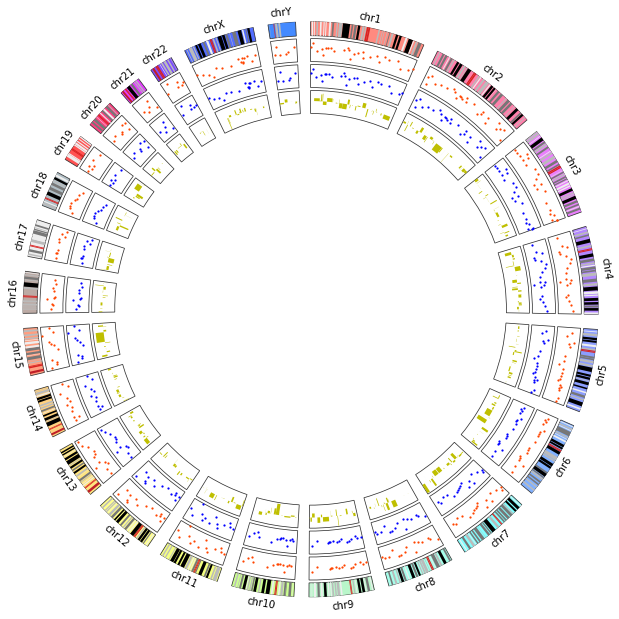

In [12]:
circle.figure

In [19]:
df = pd.read_csv('example_data_barplot.csv')
df

,chr,start,end,value
0,chr1,10382554,26901963,0.374
1,chr1,26901963,30511288,0.084
2,chr1,30956226,33621691,0.890
3,chr1,35113388,36674459,0.988
4,chr1,36674459,47502070,-0.441
...,...,...,...,...
320,chrY,15499225,23510723,0.394
321,chrY,32467702,37653727,0.004
322,chrY,46256270,47359996,-0.310
323,chrY,47392730,51431595,-0.220


In [18]:
df2 = pd.read_csv("example_data_chromosome_general.csv")
df2

,chr,start,end
0,chr1,1,249250621
1,chr2,1,243199373
2,chr3,1,198022430
3,chr4,1,191154276
4,chr5,1,180915260
5,chr6,1,171115067
6,chr7,1,159138663
7,chr8,1,146364022
8,chr9,1,141213431
9,chr10,1,135534747


# Real Data

In [1]:
import pandas as pd
df = pd.read_csv('/home/fer/Documents/cfDNA/Programs/ichorCNA/500kb/merge_cna_seg.csv')
df = df[df['logR_Copy_Number']>0.3]

df = df.drop(['event', 'logR', 'subclone.status', 'Corrected_Copy_Number',
            'logR_Copy_Number', 'copy.number' ], axis = 1)

df['Corrected_Call'].value_counts()

NEUT    63057
HETD     3912
Name: Corrected_Call, dtype: int64

In [2]:
df

,chr,start,end,Corrected_Call,ID
3,1,3000001,3500000,NEUT,UEB_0228
4,1,4000001,4500000,NEUT,UEB_0228
5,1,4500001,5000000,NEUT,UEB_0228
6,1,5000001,5500000,NEUT,UEB_0228
7,1,5500001,6000000,NEUT,UEB_0228
...,...,...,...,...,...
104574,X,149500001,150000000,NEUT,UEB_0205
104575,X,150000001,150500000,NEUT,UEB_0205
104577,X,151000001,151500000,NEUT,UEB_0205
104578,X,152500001,153000000,NEUT,UEB_0205


In [2]:
df = df.pivot(index=['chr','start','end'], columns=['ID']).T
df

chr                             1                                          \
start                   1500001   3000001   4000001   4500001   5000001     
end                     2000000   3500000   4500000   5000000   5500000     
               ID                                                           
Corrected_Call UEB_0205       NaN      NEUT       NaN      NEUT       NaN   
               UEB_0208       NaN      NEUT      NEUT      NEUT      NEUT   
               UEB_0209      NEUT      NEUT      NEUT      NEUT      NEUT   
               UEB_0210       NaN      NEUT      NEUT      NEUT      NEUT   
               UEB_0211       NaN      NEUT      NEUT      NEUT      NEUT   
               UEB_0213      NEUT      NEUT      NEUT      NEUT      NEUT   
               UEB_0214       NaN      HETD      HETD      HETD      HETD   
               UEB_0215      NEUT      NEUT      NEUT      NEUT      NEUT   
               UEB_0216       NaN      NEUT      NEUT      NEUT      NEUT   
               UEB_0217       NaN       NaN      HETD      HETD      HETD   
               UEB_0218       NaN      NEUT      NEUT      NEUT      NEUT   
               UEB_0219      HETD      HETD      HETD      HETD      HETD   
               UEB_0220       NaN      NEUT      NEUT      NEUT      NEUT   
               UEB_0221       NaN      NEUT      NEUT      NEUT      NEUT   
               UEB_0222       NaN       NaN      NEUT       NaN      NEUT   
               UEB_0223       NaN      NEUT      NEUT      NEUT      NEUT   
               UEB_0224       NaN      NEUT      NEUT      NEUT      NEUT   
               UEB_0226       NaN      NEUT      NEUT      NEUT      NEUT   
               UEB_0227       NaN      NEUT      NEUT      NEUT      NEUT   
               UEB_0228       NaN      NEUT      NEUT      NEUT      NEUT   

chr                                                                        \
start                   5500001   6000001   6500001   7000001   7500001     
end                     6000000   6500000   7000000   7500000   8000000     
               ID                                                           
Corrected_Call UEB_0205       NaN       NaN       NaN       NaN       NaN   
               UEB_0208      NEUT      NEUT      NEUT      NEUT      NEUT   
               UEB_0209       NaN      NEUT      NEUT      NEUT      NEUT   
               UEB_0210      NEUT      NEUT      NEUT      NEUT      NEUT   
               UEB_0211      NEUT      NEUT      NEUT      NEUT      NEUT   
               UEB_0213      NEUT      NEUT      NEUT      NEUT      NEUT   
               UEB_0214      HETD       NaN       NaN      HETD      HETD   
               UEB_0215      NEUT      NEUT      NEUT      NEUT      NEUT   
               UEB_0216      NEUT      NEUT      NEUT      NEUT      NEUT   
               UEB_0217       NaN       NaN      HETD      HETD       NaN   
               UEB_0218      NEUT      NEUT      NEUT      NEUT      NEUT   
               UEB_0219       NaN       NaN       NaN      HETD      HETD   
               UEB_0220      NEUT      NEUT      NEUT      NEUT      NEUT   
               UEB_0221      NEUT      NEUT      NEUT      NEUT      NEUT   
               UEB_0222       NaN       NaN       NaN       NaN       NaN   
               UEB_0223       NaN      NEUT      NEUT      NEUT      NEUT   
               UEB_0224      NEUT      NEUT       NaN      NEUT      NEUT   
               UEB_0226       NaN      NEUT       NaN       NaN      NEUT   
               UEB_0227      NEUT      NEUT      NEUT      NEUT      NEUT   
               UEB_0228      NEUT       NaN      NEUT      NEUT      NEUT   

chr                      ...         X                                \
start                    ... 146500001 147000001 147500001 148000001   
end                      ... 147000000 147500000 148000000 148500000   
               ID        ...                                           
Corrected_Call

In [3]:
df_bd = pd.DataFrame()
for i in df.columns.values:
    df_i = pd.DataFrame(df[i].value_counts())
    df_i = df_i.T
    df_bd = pd.concat([df_bd, df_i])

In [4]:
df_bd = df_bd.fillna(0)
df_bd = df_bd.drop(['NEUT'], axis = 1)
df_bd

HETD
1 1500001   2000000     1.0
  3000001   3500000     2.0
  4000001   4500000     3.0
  4500001   5000000     3.0
  5000001   5500000     3.0
...                     ...
X 150000001 150500000   0.0
  150500001 151000000   0.0
  151000001 151500000   0.0
  152500001 153000000   0.0
  154000001 154500000   0.0

[5095 rows x 1 columns]

In [5]:
# Correr solo cuando sean ganancias
#df_bd_gain = df_bd.drop(['HETD'], axis = 1)
#df_bd_gain['GAIN'] = [0] * len(df_bd_gain)
#df_bd_gain

# A partir de aqui re hacer todo el workflow



In [6]:
#df_bd.to_csv('/home/fer/Documents/cfDNA/Programs/ichorCNA/500kb/merge_cna_seg_count_gain.csv')
df_bd.to_csv('/home/fer/Documents/cfDNA/Programs/ichorCNA/500kb/merge_cna_seg_count_loss.csv')

In [7]:
df = pd.read_csv('/home/fer/Documents/cfDNA/Programs/ichorCNA/500kb/merge_cna_seg_count_loss.csv')
#df = pd.read_csv('/home/fer/Documents/cfDNA/Programs/ichorCNA/500kb/merge_cna_seg_count_gain.csv')

df.columns = ['chr', 'start', 'end', 'value']
df

,chr,start,end,value
0,1,1500001,2000000,1.0
1,1,3000001,3500000,2.0
2,1,4000001,4500000,3.0
3,1,4500001,5000000,3.0
4,1,5000001,5500000,3.0
...,...,...,...,...
5090,X,150000001,150500000,0.0
5091,X,150500001,151000000,0.0
5092,X,151000001,151500000,0.0
5093,X,152500001,153000000,0.0


In [8]:
def insert_chr (string):
    x= 'chr' + str(string)
    return x
df['chr'] = list(map(insert_chr, df['chr']))
df

,chr,start,end,value
0,chr1,1500001,2000000,1.0
1,chr1,3000001,3500000,2.0
2,chr1,4000001,4500000,3.0
3,chr1,4500001,5000000,3.0
4,chr1,5000001,5500000,3.0
...,...,...,...,...
5090,chrX,150000001,150500000,0.0
5091,chrX,150500001,151000000,0.0
5092,chrX,151000001,151500000,0.0
5093,chrX,152500001,153000000,0.0


In [9]:
df = df.set_index('chr')
df

,start,end,value
chr,,,
chr1,1500001,2000000,1.0
chr1,3000001,3500000,2.0
chr1,4000001,4500000,3.0
chr1,4500001,5000000,3.0
chr1,5000001,5500000,3.0
...,...,...,...
chrX,150000001,150500000,0.0
chrX,150500001,151000000,0.0
chrX,151000001,151500000,0.0


In [10]:
#df.to_csv('/home/fer/Documents/cfDNA/Programs/ichorCNA/500kb/merge_cna_seg_count_gain.csv')
df.to_csv('/home/fer/Documents/cfDNA/Programs/ichorCNA/500kb/merge_cna_seg_count_loss.csv')

In [12]:
pd.read_csv('/home/fer/Documents/cfDNA/Programs/ichorCNA/500kb/merge_cna_seg_count_loss.csv')

,chr,start,end,value
0,chr1,1500001,2000000,1.0
1,chr1,3000001,3500000,2.0
2,chr1,4000001,4500000,3.0
3,chr1,4500001,5000000,3.0
4,chr1,5000001,5500000,3.0
...,...,...,...,...
5090,chrX,150000001,150500000,0.0
5091,chrX,150500001,151000000,0.0
5092,chrX,151000001,151500000,0.0
5093,chrX,152500001,153000000,0.0


# Tumor

In [63]:
df = pd.read_csv('/home/fer/Documents/cfDNA/Tumor/CNVFilterSplitColumns.cns', sep = '\t')
df = df.drop(['gene', 'log2', 'ci_hici_lo', 'depth', 'iqr', 'pi_hi', 'pi_lo', 'probes',
             'sem', 'weight', 'Unnamed: 15'], axis = 1)
df

,Sample,chromosome,start,end,cn
0,UEB_10,chrY,10500,10040127,0
1,UEB_10,chrY,13105053,59363066,0
2,UEB_12,chr3,168802058,168982259,3
3,UEB_12,chr9,119564718,120479535,3
4,UEB_12,chr12,37926332,41509174,3
...,...,...,...,...,...
729,UEB_7,chrY,10500,10040127,0
730,UEB_7,chrY,13105053,59363066,0
731,UEB_8,chrY,10500,3559941,1
732,UEB_8,chrY,3559941,10040127,0


In [64]:
df['cn']= df['cn'].replace([1,0],'loss')
df['cn']= df['cn'].replace([3,4,5,6,7,8],'gain')
df = df.drop_duplicates()
df

,Sample,chromosome,start,end,cn
0,UEB_10,chrY,10500,10040127,loss
1,UEB_10,chrY,13105053,59363066,loss
2,UEB_12,chr3,168802058,168982259,gain
3,UEB_12,chr9,119564718,120479535,gain
4,UEB_12,chr12,37926332,41509174,gain
...,...,...,...,...,...
729,UEB_7,chrY,10500,10040127,loss
730,UEB_7,chrY,13105053,59363066,loss
731,UEB_8,chrY,10500,3559941,loss
732,UEB_8,chrY,3559941,10040127,loss


In [65]:
df = df.pivot(index=['chromosome','start','end'], columns=['Sample']).T
df

chromosome      chr1               chr10     chr11                      \
start      10500     142535934 42668123  60500     55179007              
end        121219774 249240121 135374562 50317971  68631520  134795984   
   Sample                                                                
cn UEB_10        NaN       NaN       NaN       NaN       NaN       NaN   
   UEB_12        NaN       NaN       NaN       NaN       NaN       NaN   
   UEB_14        NaN       NaN       NaN       NaN       NaN       NaN   
   UEB_16        NaN       NaN       NaN       NaN       NaN       NaN   
   UEB_17        NaN       NaN       NaN       NaN       NaN       NaN   
   UEB_2         NaN       NaN       NaN       NaN       NaN       NaN   
   UEB_23        NaN       NaN       NaN       NaN       NaN       NaN   
   UEB_25        NaN       NaN       NaN       NaN       NaN       NaN   
   UEB_27        NaN       NaN       NaN       NaN       NaN       NaN   
   UEB_29        NaN       NaN       NaN       NaN       NaN       NaN   
   UEB_30        NaN       NaN      loss       NaN       NaN      loss   
   UEB_31        NaN       NaN      loss       NaN       NaN      loss   
   UEB_33        NaN       NaN      loss       NaN       NaN      loss   
   UEB_35        NaN       NaN      loss       NaN       NaN      loss   
   UEB_37        NaN       NaN       NaN       NaN       NaN       NaN   
   UEB_39        NaN       NaN       NaN       NaN       NaN       NaN   
   UEB_41        NaN       NaN       NaN       NaN       NaN       NaN   
   UEB_43        NaN       NaN       NaN       NaN       NaN       NaN   
   UEB_44        NaN       NaN       NaN       NaN       NaN       NaN   
   UEB_45        NaN       NaN       NaN       NaN      gain       NaN   
   UEB_47        NaN      gain       NaN      loss       NaN       NaN   
   UEB_49        NaN       NaN       NaN       NaN       NaN       NaN   
   UEB_5         NaN       NaN       NaN       NaN       NaN       NaN   
   UEB_51        NaN       NaN       NaN       NaN       NaN       NaN   
   UEB_53        NaN      loss       NaN       NaN       NaN       NaN   
   UEB_54        NaN       NaN       NaN       NaN       NaN       NaN   
   UEB_56        NaN       NaN       NaN       NaN       NaN       NaN   
   UEB_7         NaN       NaN       NaN       NaN       NaN       NaN   
   UEB_77        NaN       NaN       NaN       NaN       NaN       NaN   
   UEB_78        NaN      gain       NaN       NaN       NaN       NaN   
   UEB_79       loss      gain       NaN      loss       NaN       NaN   
   UEB_8         NaN       NaN       NaN       NaN       NaN       NaN   

chromosome                                   chr12  ...      chrY            \
start      59845522  65114167  70377301  25358107   ... 2814339   2963460     
end        70377301  65884835  134795984 25362352   ... 10040127  10040127    
   Sample                                           ...                       
cn UEB_10        NaN       NaN       NaN       NaN  ...       NaN       NaN   
   UEB_12        NaN       NaN       NaN       NaN  ...       NaN       NaN   
   UEB_14        NaN       NaN       NaN       NaN  ...       NaN       NaN   
   UEB_16        NaN       NaN       NaN       NaN  ...       NaN       NaN   
   UEB_17        NaN       NaN       NaN       NaN  ...      loss       NaN   
   UEB_2         NaN       NaN       NaN       NaN  ...       NaN       NaN   
   UEB_23        NaN       NaN       NaN       NaN  ...       NaN       NaN   
   UEB_25        NaN       NaN       NaN       NaN  ...       NaN       NaN   
   UEB_27        NaN       NaN       NaN       NaN  ...       NaN       NaN   
   UEB_29        NaN       NaN       NaN       NaN  ...       NaN       NaN   
   UEB_30        NaN       NaN       NaN       NaN  ...       NaN       NaN   
   UEB_31        NaN       NaN       NaN       NaN  ...       NaN       NaN   
   UEB_33        NaN       NaN       NaN       NaN  ...      loss      

In [66]:
df_bd = pd.DataFrame()
for i in df.columns.values:
    df_i = pd.DataFrame(df[i].value_counts())
    df_i = df_i.T
    df_bd = pd.concat([df_bd, df_i])

In [68]:
df_bd = df_bd.fillna(0)
df_bd

loss  gain
chr1  10500     121219774   1.0   0.0
      142535934 249240121   1.0   3.0
chr10 42668123  135374562   4.0   0.0
chr11 60500     50317971    2.0   0.0
      55179007  68631520    0.0   1.0
...                         ...   ...
chrY  6244107   10040127    1.0   0.0
      6691468   10040127    1.0   0.0
      13105053  19008168    1.0   0.0
                59363066   31.0   0.0
      19008168  59363066    1.0   0.0

[129 rows x 2 columns]

In [69]:
#df_bd.to_csv('/home/fer/Documents/cfDNA/Programs/ichorCNA/500kb/merge_cna_seg_tumor_count.csv')

In [70]:
df = pd.read_csv('/home/fer/Documents/cfDNA/Programs/ichorCNA/500kb/merge_cna_seg_tumor_count.csv')
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,loss,gain
0,chr1,10500,121219774,1.0,0.0
1,chr1,142535934,249240121,1.0,3.0
2,chr10,42668123,135374562,4.0,0.0
3,chr11,60500,50317971,2.0,0.0
4,chr11,55179007,68631520,0.0,1.0
...,...,...,...,...,...
124,chrY,6244107,10040127,1.0,0.0
125,chrY,6691468,10040127,1.0,0.0
126,chrY,13105053,19008168,1.0,0.0
127,chrY,13105053,59363066,31.0,0.0


In [72]:
df_wl = df.drop(['gain'], axis = 1)
df_wl.columns = ['chr', 'start', 'end', 'value']
df_wl

,chr,start,end,value
0,chr1,10500,121219774,1.0
1,chr1,142535934,249240121,1.0
2,chr10,42668123,135374562,4.0
3,chr11,60500,50317971,2.0
4,chr11,55179007,68631520,0.0
...,...,...,...,...
124,chrY,6244107,10040127,1.0
125,chrY,6691468,10040127,1.0
126,chrY,13105053,19008168,1.0
127,chrY,13105053,59363066,31.0


In [73]:
df_wl = df_wl.set_index('chr')
df_wl.to_csv('/home/fer/Documents/cfDNA/Programs/ichorCNA/500kb/merge_cna_seg_tumor_count_loss.csv')

In [74]:
df_wg = df.drop(['loss'], axis = 1)
df_wg.columns = ['chr', 'start', 'end', 'value']
df_wg

,chr,start,end,value
0,chr1,10500,121219774,0.0
1,chr1,142535934,249240121,3.0
2,chr10,42668123,135374562,0.0
3,chr11,60500,50317971,0.0
4,chr11,55179007,68631520,1.0
...,...,...,...,...
124,chrY,6244107,10040127,0.0
125,chrY,6691468,10040127,0.0
126,chrY,13105053,19008168,0.0
127,chrY,13105053,59363066,0.0


In [75]:
df_wg = df_wg.set_index('chr')
df_wg.to_csv('/home/fer/Documents/cfDNA/Programs/ichorCNA/500kb/merge_cna_seg_tumor_count_gain.csv')


# Plot

In [34]:
import pandas as pd
df = pd.read_csv('/home/fer/Documents/cfDNA/Programs/ichorCNA/500kb/merge_cna_seg_count_lite.csv')
#df = df.drop(['NEUT', 'GAIN'], axis = 1)
#df.columns = ['chr', 'start', 'end','value']
df

,chr,start,end,value
0,chr1,1000001,1500000,3.0
1,chr1,1500001,2000000,3.0
2,chr1,2000001,2500000,3.0
3,chr1,3000001,3500000,3.0
4,chr1,4000001,4500000,3.0
...,...,...,...,...
5224,chrX,150000001,150500000,0.0
5225,chrX,150500001,151000000,0.0
5226,chrX,151000001,151500000,0.0
5227,chrX,152500001,153000000,0.0


In [76]:
import pycircos
import collections
import matplotlib.pyplot as plt
Garc    = pycircos.Garc
Gcircle = pycircos.Gcircle

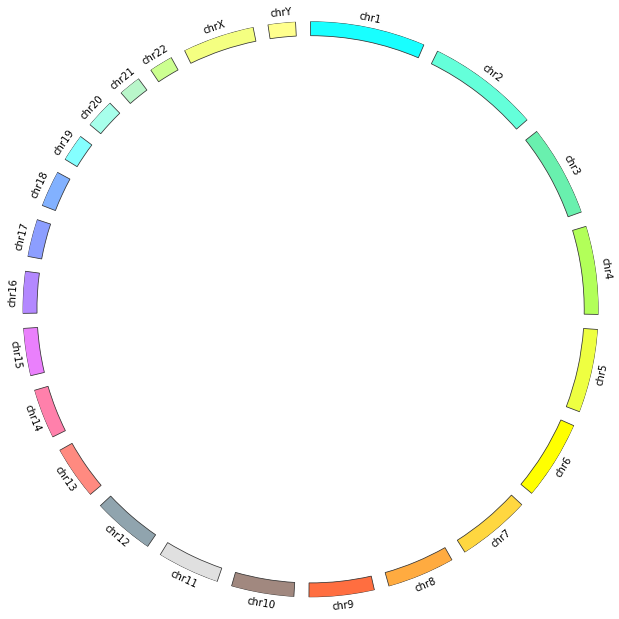

In [77]:
#Set chromosomes
circle = Gcircle() 
with open("example_data_chromosome_general.csv") as f:
    f.readline()
    for line in f:
        line   = line.rstrip().split(",") 
        name   = line[0]
        length = int(line[-1]) 
        arc    = Garc(arc_id=name, size=length, interspace=3, raxis_range=(950,1000), labelposition=60, label_visible=True)
        circle.add_garc(arc)
circle.set_garcs() 

In [78]:
#cytoband
import collections
color_dict   = {"gneg":"#FFFFFF00", "gpos25":"#EEEEEE", "gpos50":"#BBBBBB", "gpos75":"#777777", "gpos100":"#000000", "gvar":"#FFFFFF00", "stalk":"#C01E27", 
               "acen":"#D82322"}

arcdata_dict = collections.defaultdict(dict)
with open("example_data_chromosome_cytoband.csv") as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name  = line[0]     
        start = int(line[1])-1 
        width = int(line[2])-(int(line[1])-1) 
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["widths"]    = [] 
            arcdata_dict[name]["colors"]    = [] 
        arcdata_dict[name]["positions"].append(start) 
        arcdata_dict[name]["widths"].append(width)
        arcdata_dict[name]["colors"].append(color_dict[line[-1]])

for key in arcdata_dict:
    circle.barplot(key, data=[1]*len(arcdata_dict[key]["positions"]), positions=arcdata_dict[key]["positions"], 
                   width=arcdata_dict[key]["widths"], raxis_range=[950,1000], facecolor=arcdata_dict[key]["colors"])    

In [79]:
#bar plot
#values_all   = [] 
#arcdata_dict = collections.defaultdict(dict)
#with open("/home/fer/Documents/cfDNA/Programs/ichorCNA/500kb/merge_cna_seg_count_lite.csv") as f:
#    f.readline()
#    for line in f:
#        line  = line.rstrip().split(",")
#        name  = line[0]     
#        start = int(line[1])-1
#        end   = int(line[2]) 
#        width = end-start 
#        if name not in arcdata_dict:
#            arcdata_dict[name]["positions"] = []
#            arcdata_dict[name]["widths"]    = [] 
#            arcdata_dict[name]["values"]    = [] 
#        arcdata_dict[name]["positions"].append(start) 
#        arcdata_dict[name]["widths"].append(width)
#        arcdata_dict[name]["values"].append(float(line[-1]))
#        values_all.append(float(line[-1]))

#vmin, vmax = min(values_all), max(values_all) 
#for key in arcdata_dict:  
#    circle.barplot(key, data=arcdata_dict[key]["values"], positions=arcdata_dict[key]["positions"], 
#                   width=arcdata_dict[key]["widths"], base_value=0.0, rlim=[vmin-0.05*abs(vmin), vmax+0.05*abs(vmax)],
#                   raxis_range=[770,850], facecolor="blue", spine=True)

In [80]:
#line plot
#values_all   = [] 
#arcdata_dict = collections.defaultdict(dict)
#with open("/home/fer/Documents/cfDNA/Programs/ichorCNA/500kb/merge_cna_seg_count_lite.csv") as f:
#    f.readline()
#    for line in f:
#        line  = line.rstrip().split(",")
#        name  = line[0]     
#        start = int(line[1])-1
#        end   = int(line[2]) 
#        mid   = (start+end)/2
#        value = float(line[-1]) 
#        values_all.append(value) 
#        if name not in arcdata_dict:
#            arcdata_dict[name]["positions"] = []
#            arcdata_dict[name]["values"] = []
#        arcdata_dict[name]["positions"].append(mid) 
#        arcdata_dict[name]["values"].append(value)
    
#vmin, vmax = min(values_all), max(values_all) 
#for key in arcdata_dict:
#    circle.lineplot(key, data=arcdata_dict[key]["values"], positions=arcdata_dict[key]["positions"], 
#                    rlim=[vmin-0.05*abs(vmin), vmax+0.05*abs(vmax)], raxis_range=(770,850), linecolor="royalblue") 

In [81]:
#scatter plot
values_all   = [] 
arcdata_dict = collections.defaultdict(dict)
with open("/home/fer/Documents/cfDNA/Programs/ichorCNA/500kb/merge_cna_seg_count_lite.csv") as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name  = line[0]     
        start = int(line[1])-1
        end   = int(line[2]) 
        mid   = (start+end)/2
        value = float(line[-1]) 
        values_all.append(value) 
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["values"] = []
        arcdata_dict[name]["positions"].append(mid) 
        arcdata_dict[name]["values"].append(value)
    
vmin, vmax = min(values_all), max(values_all) 
for key in arcdata_dict:
    circle.scatterplot(key, data=arcdata_dict[key]["values"], positions=arcdata_dict[key]["positions"], 
                       rlim=[vmin-0.05*abs(vmin), vmax+0.05*abs(vmax)], raxis_range=(860,940), facecolor="#2e81c6", spine=True) 

In [82]:
#scatter plot
values_all   = [] 
arcdata_dict = collections.defaultdict(dict)
with open("/home/fer/Documents/cfDNA/Programs/ichorCNA/500kb/merge_cna_seg_tumor_count_loss.csv") as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name  = line[0]     
        start = int(line[1])-1
        end   = int(line[2]) 
        mid   = (start+end)/2
        value = float(line[-1]) 
        values_all.append(value) 
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["values"] = []
        arcdata_dict[name]["positions"].append(mid) 
        arcdata_dict[name]["values"].append(value)
    
vmin, vmax = min(values_all), max(values_all) 
for key in arcdata_dict:
    circle.scatterplot(key, data=arcdata_dict[key]["values"], positions=arcdata_dict[key]["positions"], 
                       rlim=[vmin-0.05*abs(vmin), vmax+0.05*abs(vmax)], raxis_range=(770,850), facecolor="blue", spine=True) 

In [83]:
#scatter plot
values_all   = [] 
arcdata_dict = collections.defaultdict(dict)
with open("/home/fer/Documents/cfDNA/Programs/ichorCNA/500kb/merge_cna_seg_tumor_count_gain.csv") as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name  = line[0]     
        start = int(line[1])-1
        end   = int(line[2]) 
        mid   = (start+end)/2
        value = float(line[-1]) 
        values_all.append(value) 
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["values"] = []
        arcdata_dict[name]["positions"].append(mid) 
        arcdata_dict[name]["values"].append(value)
    
vmin, vmax = min(values_all), max(values_all) 
for key in arcdata_dict:
    circle.scatterplot(key, data=arcdata_dict[key]["values"], positions=arcdata_dict[key]["positions"], 
                       rlim=[vmin-0.05*abs(vmin), vmax+0.05*abs(vmax)], raxis_range=(680,760), facecolor="red", spine=True) 

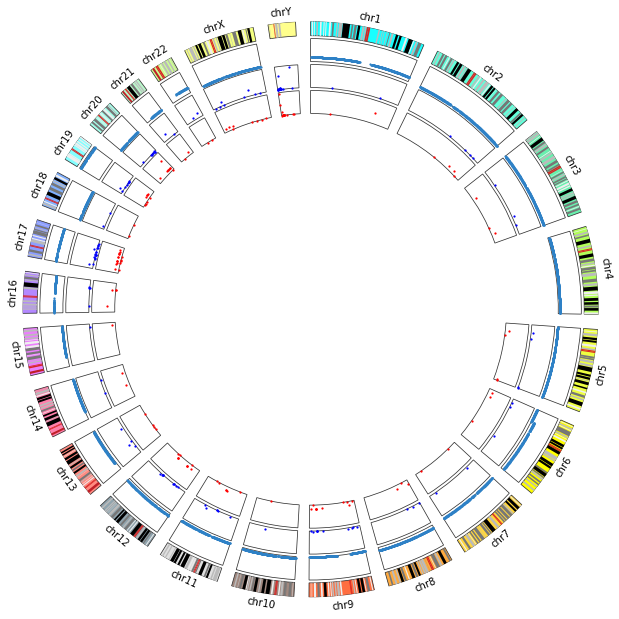

In [84]:
circle.figure

In [15]:
import pandas as pd
df = pd.read_csv('example_data_chromosome_general.csv')
df = df[df['chr']!= 'chrY']
df = df.set_index('chr')
df.to_csv('data_chromosome_general_sinChrY.csv')

In [17]:
df = pd.read_csv('example_data_chromosome_cytoband.csv')
df = df[df['chr']!= 'chrY']
df = df.set_index('chr')
df.to_csv('data_chromosome_cytoband_sinChrY.csv')

In [24]:
df = pd.read_csv('example_data_chromosome_general.csv')
df = df[df['chr']!= 'chr4']
df = df.set_index('chr')
df.to_csv('data_chromosome_general_sinChr4.csv')

In [25]:
df = pd.read_csv('example_data_chromosome_cytoband.csv')
df = df[df['chr']!= 'chr4']
df = df.set_index('chr')
df.to_csv('data_chromosome_cytoband_sinChr4.csv')

# Filtrado por confiabilidad

# Separado
## cfDNA

In [1]:
import pycircos
import collections
import matplotlib.pyplot as plt
Garc    = pycircos.Garc
Gcircle = pycircos.Gcircle
import pandas as pd

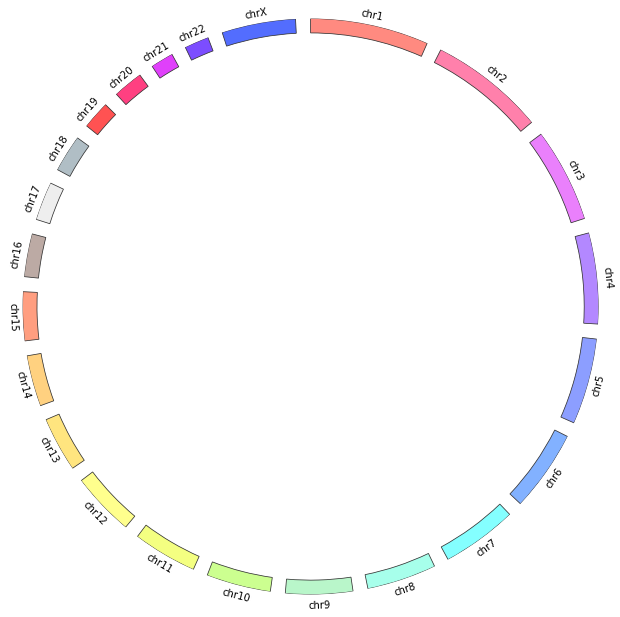

In [2]:
#Set chromosomes
circle = Gcircle() 
with open("data_chromosome_general_sinChrY.csv") as f:
    f.readline()
    for line in f:
        line   = line.rstrip().split(",") 
        name   = line[0]
        length = int(line[-1]) 
        arc    = Garc(arc_id=name, size=length, interspace=3, raxis_range=(950,1000), labelposition=60, label_visible=True)
        circle.add_garc(arc)
circle.set_garcs() 

In [3]:
#cytoband
import collections
color_dict   = {"gneg":"#FFFFFF00", "gpos25":"#EEEEEE", "gpos50":"#BBBBBB", "gpos75":"#777777", "gpos100":"#000000", "gvar":"#FFFFFF00", "stalk":"#C01E27", 
               "acen":"#D82322"}

arcdata_dict = collections.defaultdict(dict)
with open("data_chromosome_cytoband_sinChrY.csv") as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name  = line[0]     
        start = int(line[1])-1 
        width = int(line[2])-(int(line[1])-1) 
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["widths"]    = [] 
            arcdata_dict[name]["colors"]    = [] 
        arcdata_dict[name]["positions"].append(start) 
        arcdata_dict[name]["widths"].append(width)
        arcdata_dict[name]["colors"].append(color_dict[line[-1]])

for key in arcdata_dict:
    circle.barplot(key, data=[1]*len(arcdata_dict[key]["positions"]), positions=arcdata_dict[key]["positions"], 
                   width=arcdata_dict[key]["widths"], raxis_range=[950,1000], facecolor=arcdata_dict[key]["colors"])    

In [4]:
pd.read_csv('/home/fer/Documents/cfDNA/Programs/ichorCNA/500kb/merge_cna_seg_count_loss.csv')

,chr,start,end,value
0,chr1,1500001,2000000,1.0
1,chr1,3000001,3500000,2.0
2,chr1,4000001,4500000,3.0
3,chr1,4500001,5000000,3.0
4,chr1,5000001,5500000,3.0
...,...,...,...,...
5090,chrX,150000001,150500000,0.0
5091,chrX,150500001,151000000,0.0
5092,chrX,151000001,151500000,0.0
5093,chrX,152500001,153000000,0.0


In [5]:
#line  2

values_all   = [] 
arcdata_dict = collections.defaultdict(dict)
with open("/home/fer/Documents/cfDNA/Programs/ichorCNA/500kb/merge_cna_seg_count_loss.csv") as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name  = line[0]     
        start = int(line[1])-1
        end   = int(line[2]) 
        mid   = (start+end)/2
        value = float(line[-1]) 
        values_all.append(value) 
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["values"] = []
        arcdata_dict[name]["positions"].append(mid) 
        arcdata_dict[name]["values"].append(value)
    
vmin, vmax = min(values_all), max(values_all) 
for key in arcdata_dict:
    circle.lineplot(key, data=arcdata_dict[key]["values"], positions=arcdata_dict[key]["positions"], 
                       rlim=[vmin-0.05*abs(vmin), vmax+0.05*abs(vmax)], linecolor="#2e81c6", raxis_range=(800,940),  spine=True) 

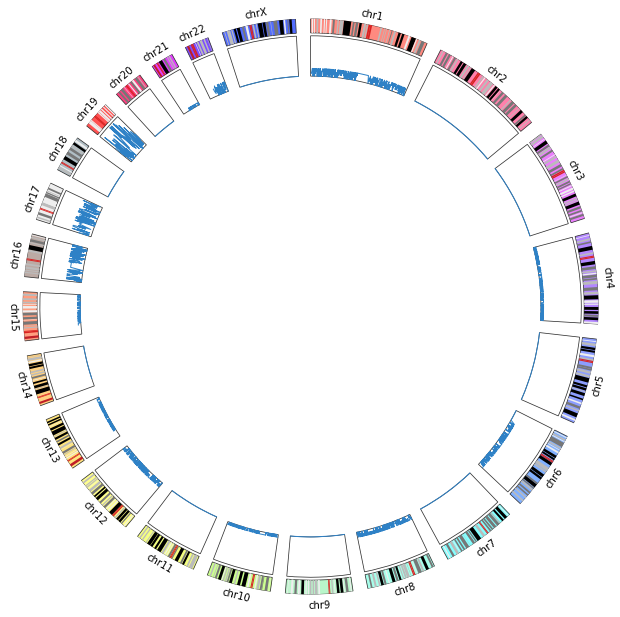

In [6]:
circle.figure

In [7]:
plt = circle.figure
plt.savefig("/home/fer/circus_cfDNA.pdf", dpi = 300, pad_inches=0.2, bbox_inches='tight')

## Tumor

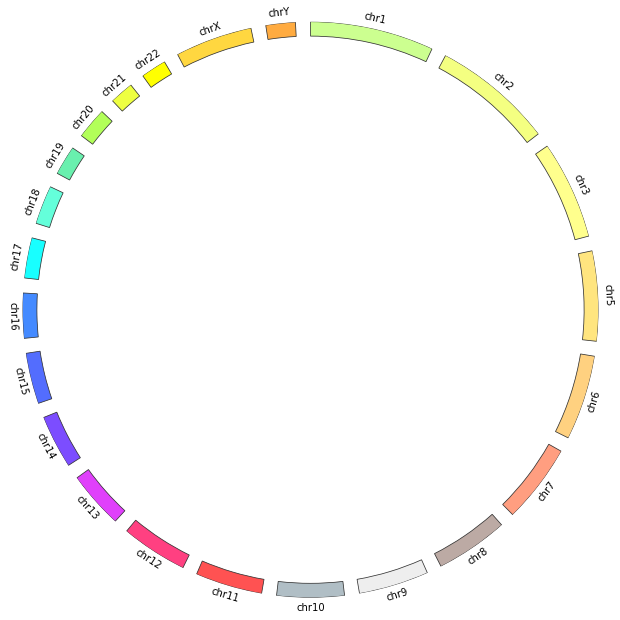

In [69]:
#Set chromosomes
circle = Gcircle() 
with open("data_chromosome_general_sinChr4.csv") as f:
    f.readline()
    for line in f:
        line   = line.rstrip().split(",") 
        name   = line[0]
        length = int(line[-1]) 
        arc    = Garc(arc_id=name, size=length, interspace=3, raxis_range=(950,1000), labelposition=60, label_visible=True)
        circle.add_garc(arc)
circle.set_garcs() 

In [70]:
#cytoband
import collections
color_dict   = {"gneg":"#FFFFFF00", "gpos25":"#EEEEEE", "gpos50":"#BBBBBB", "gpos75":"#777777", "gpos100":"#000000", "gvar":"#FFFFFF00", "stalk":"#C01E27", 
               "acen":"#D82322"}

arcdata_dict = collections.defaultdict(dict)
with open("data_chromosome_cytoband_sinChr4.csv") as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name  = line[0]     
        start = int(line[1])-1 
        width = int(line[2])-(int(line[1])-1) 
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["widths"]    = [] 
            arcdata_dict[name]["colors"]    = [] 
        arcdata_dict[name]["positions"].append(start) 
        arcdata_dict[name]["widths"].append(width)
        arcdata_dict[name]["colors"].append(color_dict[line[-1]])

for key in arcdata_dict:
    circle.barplot(key, data=[1]*len(arcdata_dict[key]["positions"]), positions=arcdata_dict[key]["positions"], 
                   width=arcdata_dict[key]["widths"], raxis_range=[950,1000], facecolor=arcdata_dict[key]["colors"])    

In [71]:
#scatter plot
values_all   = [] 
arcdata_dict = collections.defaultdict(dict)
with open("/home/fer/Documents/cfDNA/Programs/ichorCNA/500kb/merge_cna_seg_tumor_count_loss.csv") as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name  = line[0]     
        start = int(line[1])-1
        end   = int(line[2]) 
        mid   = (start+end)/2
        value = float(line[-1]) 
        values_all.append(value) 
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["values"] = []
        arcdata_dict[name]["positions"].append(mid) 
        arcdata_dict[name]["values"].append(value)
    
vmin, vmax = min(values_all), max(values_all) 
for key in arcdata_dict:
    circle.scatterplot(key, data=arcdata_dict[key]["values"], positions=arcdata_dict[key]["positions"], 
                       rlim=[vmin-0.05*abs(vmin), vmax+0.05*abs(vmax)], raxis_range=(770,940), facecolor="#2e81c6", spine=True) 

In [72]:
#scatter plot
values_all   = [] 
arcdata_dict = collections.defaultdict(dict)
with open("/home/fer/Documents/cfDNA/Programs/ichorCNA/500kb/merge_cna_seg_tumor_count_gain.csv") as f:
    f.readline()
    for line in f:
        line  = line.rstrip().split(",")
        name  = line[0]     
        start = int(line[1])-1
        end   = int(line[2]) 
        mid   = (start+end)/2
        value = float(line[-1]) 
        values_all.append(value) 
        if name not in arcdata_dict:
            arcdata_dict[name]["positions"] = []
            arcdata_dict[name]["values"] = []
        arcdata_dict[name]["positions"].append(mid) 
        arcdata_dict[name]["values"].append(value)
    
vmin, vmax = min(values_all), max(values_all) 
for key in arcdata_dict:
    circle.scatterplot(key, data=arcdata_dict[key]["values"], positions=arcdata_dict[key]["positions"], 
                       rlim=[vmin-0.05*abs(vmin), vmax+0.05*abs(vmax)], raxis_range=(580,750), facecolor="red", spine=True) 

In [74]:

plt = circle.figure
plt.savefig("/home/fer/circus_tumor.pdf", dpi = 300, pad_inches=0.2, bbox_inches='tight')